# **Solving the Schrödinger Equation for a Particle in a 3D Box**

## **Motivation**
The Schrödinger equation is the foundation of  Ab initio quantum mechanics, describing how quantum systems evolve and behave. The 3D particle in a box is a simple model that demonstrates:
- **Quantum Confinement**: How particles are restricted to specific regions in space.
- **Energy Quantization**: The emergence of discrete energy levels due to confinement.
- **Wavefunctions and Probability Densities**: Insights into the spatial distribution of quantum particles.

This problem is a gateway to understanding more complex systems, such as atoms, molecules, and nanostructures.

---

## **Code Explanation**

### **1. Energy Eigenvalues**
For a particle confined in a 3D rectangular box with dimensions $L_x$, $L_y$, and $L_z$, the energy eigenvalues are given by:
$$
E_{n_x, n_y, n_z} = \frac{\hbar^2 \pi^2}{2m} \left( \frac{n_x^2}{L_x^2} + \frac{n_y^2}{L_y^2} + \frac{n_z^2}{L_z^2} \right)
$$
Where:
- $n_x, n_y, n_z$ are the quantum numbers ($n = 1, 2, 3, \ldots$).
- $L_x, L_y, L_z$ are the dimensions of the box.
- $m$ is the particle's mass.

**Code Highlights**:
- Energies are computed for all combinations of $n_x, n_y, n_z$ within a specified range.
- Energies and quantum numbers are sorted for easier interpretation.

### **2. Wavefunctions**
The wavefunction for a 3D box is separable:
$$
\psi(x, y, z) = \sqrt{\frac{2}{L_x}} \sin\left(\frac{n_x \pi x}{L_x}\right) 
\sqrt{\frac{2}{L_y}} \sin\left(\frac{n_y \pi y}{L_y}\right) 
\sqrt{\frac{2}{L_z}} \sin\left(\frac{n_z \pi z}{L_z}\right)
$$
Each component is a sine function, and the product gives the full spatial wavefunction.

**Code Highlights**:
- **`wavefunction_3d`** calculates the wavefunction for a grid of points $(x, y, z)$.
- The function is normalized for probabilistic interpretation.

### **3. Probability Density**
The probability density represents the likelihood of finding a particle at a specific point:
\[
|\psi(x, y, z)|^2
\]
This is computed as the square of the wavefunction.

**Code Highlights**:
- The 3D probability density is evaluated on a spatial grid.

---

## **Visualization**
### **Isosurface Representation**
To visualize the 3D probability density:
- A grid of points $(x, y, z)$ is generated.
- Points where the probability density exceeds a threshold are plotted.

**Code Highlights**:
- **`ax.scatter`** is used to display regions of high probability density.

---

## **Key Steps in the Code**

### **Step 1: Compute Energies**
- The **`energy_3d`** function calculates energy eigenvalues based on quantum numbers and box dimensions.
- Energies are sorted, and corresponding quantum numbers are stored.

### **Step 2: Calculate Wavefunctions**
- The **`wavefunction_3d`** function computes the wavefunction using sine functions.

### **Step 3: Generate 3D Probability Density**
- The probability density is computed on a 3D spatial grid.

### **Step 4: Visualize Probability Density**
- The probability density is visualized as clusters of points where the density exceeds a specified threshold.

---

## **Relevance**
1. **Fundamental Insights**:
   - Demonstrates how quantum systems behave under confinement.
   - Shows the origin of quantized energy levels.

2. **Applications**:
   - **Nanotechnology**: Explains the behavior of electrons in quantum dots.
   - **Material Science**: Provides intuition for band structures in solids.

3. **Educational Value**:
   - Serves as a foundation for understanding more complex quantum systems, such as molecules and multi-electron atoms.

---

## **Extensions**
1. **Add External Potentials**:
   - Introduce additional potentials (e.g., harmonic oscillators) to study perturbations.
2. **Multi-Particle Systems**:
   - Extend the model to include particle interactions.
3. **Advanced Visualization**:
   - Use volumetric rendering to better represent 3D wavefunctions.

---

The 3D particle in a box problem provides a rich yet accessible framework for exploring quantum mechanics. It illustrates the principles of energy quantization, wavefunctions, and probability densities, offering foundational insights into quantum behavior. By numerically solving and visualizing this system, we bridge theoretical concepts with computational tools, laying the groundwork for more advanced quantum studies.


Energy levels (sorted):
State 1: E = 14.8044, Quantum numbers (nx, ny, nz) = (np.int64(1), np.int64(1), np.int64(1))
State 2: E = 29.6088, Quantum numbers (nx, ny, nz) = (np.int64(1), np.int64(1), np.int64(2))
State 3: E = 29.6088, Quantum numbers (nx, ny, nz) = (np.int64(1), np.int64(2), np.int64(1))
State 4: E = 29.6088, Quantum numbers (nx, ny, nz) = (np.int64(2), np.int64(1), np.int64(1))
State 5: E = 44.4132, Quantum numbers (nx, ny, nz) = (np.int64(2), np.int64(1), np.int64(2))
State 6: E = 44.4132, Quantum numbers (nx, ny, nz) = (np.int64(2), np.int64(2), np.int64(1))
State 7: E = 44.4132, Quantum numbers (nx, ny, nz) = (np.int64(1), np.int64(2), np.int64(2))
State 8: E = 54.2828, Quantum numbers (nx, ny, nz) = (np.int64(1), np.int64(1), np.int64(3))
State 9: E = 54.2828, Quantum numbers (nx, ny, nz) = (np.int64(1), np.int64(3), np.int64(1))
State 10: E = 54.2828, Quantum numbers (nx, ny, nz) = (np.int64(3), np.int64(1), np.int64(1))
State 11: E = 59.2176, Quantum numbers (nx, n

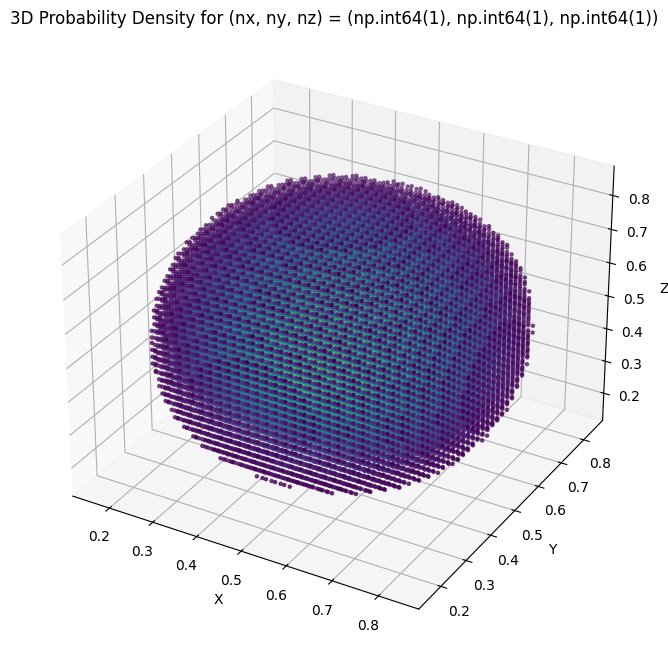

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
hbar = 1.0  # Reduced Planck's constant (set to 1 for simplicity)
m = 1.0     # Mass of the particle
Lx, Ly, Lz = 1.0, 1.0, 1.0  # Dimensions of the box
nx_max, ny_max, nz_max = 3, 3, 3  # Maximum quantum numbers to consider

# Analytical solution for energy levels in a 3D box
def energy_3d(nx, ny, nz, Lx, Ly, Lz):
    """
    Calculate the energy eigenvalue for quantum numbers nx, ny, nz in a 3D box.
    """
    return (hbar**2 * np.pi**2 / (2 * m)) * (
        (nx / Lx)**2 + (ny / Ly)**2 + (nz / Lz)**2
    )

# Generate energies and corresponding quantum numbers
energies = []
quantum_numbers = []
for nx in range(1, nx_max + 1):
    for ny in range(1, ny_max + 1):
        for nz in range(1, nz_max + 1):
            E = energy_3d(nx, ny, nz, Lx, Ly, Lz)
            energies.append(E)
            quantum_numbers.append((nx, ny, nz))

# Sort energies and quantum numbers
energies = np.array(energies)
quantum_numbers = np.array(quantum_numbers)
sorted_indices = np.argsort(energies)
energies = energies[sorted_indices]
quantum_numbers = quantum_numbers[sorted_indices]

# Display energies and quantum numbers
print("Energy levels (sorted):")
for i, E in enumerate(energies):
    print(f"State {i+1}: E = {E:.4f}, Quantum numbers (nx, ny, nz) = {tuple(quantum_numbers[i])}")

# Wavefunction for a 3D box
def wavefunction_3d(x, y, z, nx, ny, nz, Lx, Ly, Lz):
    """
    Calculate the wavefunction for quantum numbers nx, ny, nz in a 3D box.
    """
    psi_x = np.sqrt(2 / Lx) * np.sin(nx * np.pi * x / Lx)
    psi_y = np.sqrt(2 / Ly) * np.sin(ny * np.pi * y / Ly)
    psi_z = np.sqrt(2 / Lz) * np.sin(nz * np.pi * z / Lz)
    return psi_x * psi_y * psi_z

# Visualizing the probability density for the first energy state
nx, ny, nz = quantum_numbers[0]  # Ground state quantum numbers

# Create a grid of points in 3D space
x = np.linspace(0, Lx, 50)
y = np.linspace(0, Ly, 50)
z = np.linspace(0, Lz, 50)
X, Y, Z = np.meshgrid(x, y, z)

# Compute the wavefunction and probability density
psi = wavefunction_3d(X, Y, Z, nx, ny, nz, Lx, Ly, Lz)
prob_density = psi**2

# Visualizing the probability density in 3D (isosurfaces)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot isosurfaces of probability density
threshold = 0.2 * prob_density.max()  # Adjust threshold for visualization
ax.scatter(
    X[prob_density > threshold],
    Y[prob_density > threshold],
    Z[prob_density > threshold],
    c=prob_density[prob_density > threshold],
    cmap='viridis',
    s=5
)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f"3D Probability Density for (nx, ny, nz) = {nx, ny, nz}")
plt.show()
